## Milestone 1: Download Air Quality Dataset, Preprocess, and EDA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Load Dataset -----------------
df = pd.read_csv("AirQualityUCI.csv")
print(df)


           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
9466        NaN       NaN     NaN          NaN       NaN       NaN   
9467        NaN       NaN     NaN          NaN       NaN       NaN   
9468        NaN       NaN     NaN          NaN       NaN       NaN   
9469        NaN       NaN     NaN          NaN       NaN       NaN   
9470        NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0  

In [13]:
# Drop extra empty columns caused by trailing commas
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [9]:
# Merge Date + Time into datetime
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=False, errors="coerce")

# Drop old Date & Time
df.drop(columns=["Date", "Time"], inplace=True)



In [ ]:
# ----------------- Data Preprocessing -----------------
# Replace invalid -200 with NaN
df.replace(-200, pd.NA, inplace=True)

# Drop rows that are all NaN
df.dropna(how="all", inplace=True)

# Forward fill
df.fillna(method="ffill", inplace=True)

# Ensure numeric types
for col in df.columns:
    if col != "Datetime":
        df[col] = pd.to_numeric(df[col], errors="coerce")


# Remove duplicates
df.drop_duplicates(inplace=True)



C:\Users\nehan\AppData\Local\Temp\ipykernel_21536\334489867.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\nehan\AppData\Local\Temp\ipykernel_21536\334489867.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method="ffill", inplace=True)


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB
None

Missi

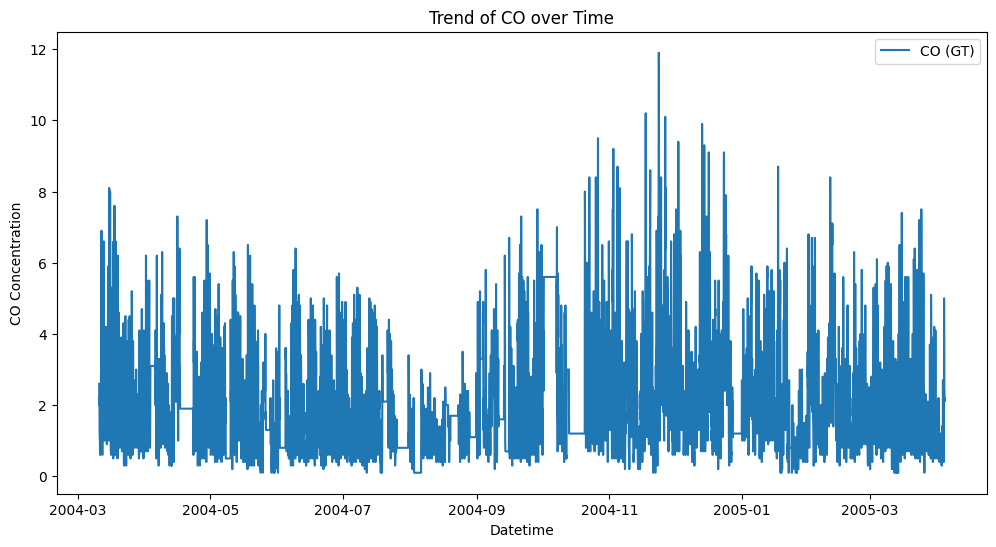

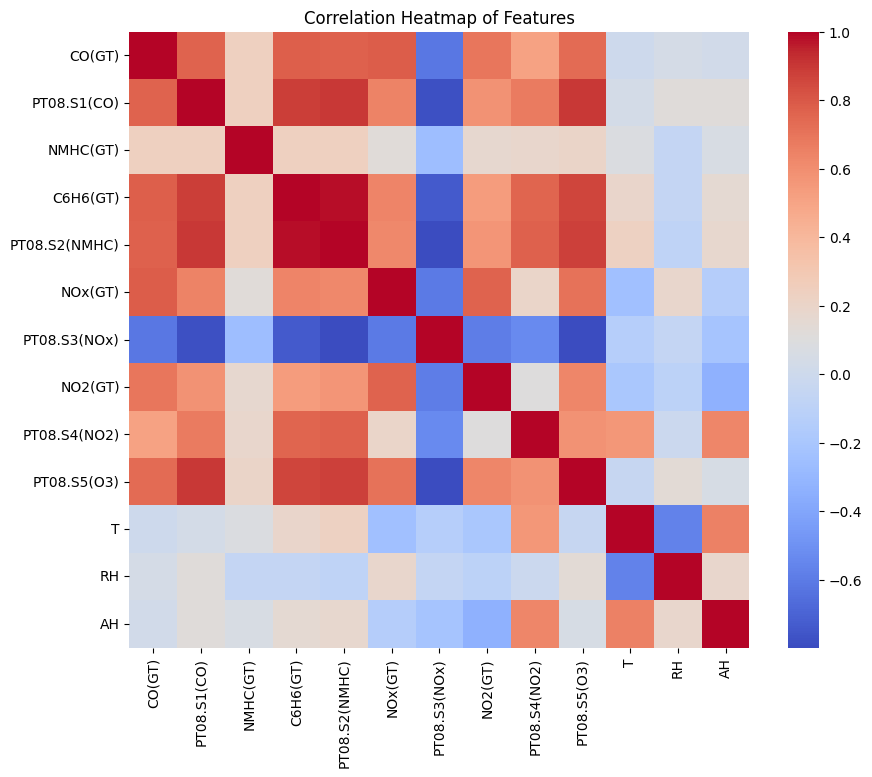

In [11]:
# ----------------- EDA -----------------
print("Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# Plot CO(GT) over time
plt.figure(figsize=(12,6))
plt.plot(df["Datetime"], df["CO(GT)"], label="CO (GT)")
plt.xlabel("Datetime")
plt.ylabel("CO Concentration")
plt.title("Trend of CO over Time")
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()
